In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# location to save figures
import os
cwd = os.getcwd()
figure_path = cwd + '/figures/'

# ECO Mocks

In [3]:
# load halo catalog

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from halotools import sim_manager
simname = 'vishnu_130'
halocat = sim_manager.CachedHaloCatalog(simname = simname, redshift=0.0, dz_tol = 0.1,
                                        version_name='custom', halo_finder='Rockstar')

In [4]:
# define galaxy-halo connection
from halotools.empirical_models import SubhaloModelFactory
from eco_mocks.sham_model import DeconvolveSHAM, HaloProps
from eco_mocks.galaxy_abundance_functions import Eckert_2016_phi

# define primary galaxy property abundance function
phi = Eckert_2016_phi(sample='RESOLVE-B SMF single')

# define stellar mass model
sm_model =  DeconvolveSHAM(stellar_mass_function = phi, scatter=0.15, prim_haloprop='halo_vpeak', Lbox=halocat.Lbox)

# carry over some halo properties to the mock table
additional_halo_properties = HaloProps()

model_instance = SubhaloModelFactory(stellar_mass = sm_model, haloprops = additional_halo_properties)

In [5]:
# populate mock catalog
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table

Error automatically detecting Lbox.
Lbox = 130.0


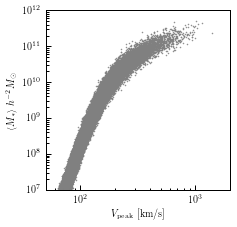

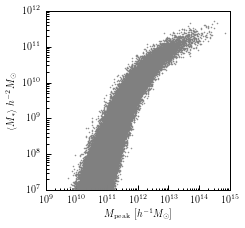

In [6]:
# plot stellar mass-vpeak relation
plt.figure(figsize=(3.3,3.3))
plt.plot(mock['halo_vpeak'], mock['stellar_mass'], '.', color='grey', ms=1)
plt.ylabel(r'$\langle M_{*}\rangle~h^{-2}M_{\odot}$')
plt.ylim([10**7.0,10**12.0])
plt.xlim([50,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$V_{\rm peak}~[{\rm km/s}]$')
plt.show()

# plot SMHM relation
plt.figure(figsize=(3.3,3.3))
plt.plot(mock['halo_mpeak'], mock['stellar_mass'], '.', color='grey', ms=1)
plt.ylabel(r'$\langle M_{*}\rangle~h^{-2}M_{\odot}$')
plt.ylim([10**7.0,10**12.0])
plt.xlim([10**9,10**15])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\rm peak}~[h^{-1}M_{\odot}]$')
plt.show()